## Differnet Criteria: 
Simple criteria are: 
- Budget Focus: Lowest Prices, Tolerant Crowd, Less than ideal perfect condition
- Family Focus: Seek balances between cost and convients, avoid extreme crows and wheather, value amentites and beginner and intermeidate terrian
- Expert/ Snow enthusiast: Prioritized Ideal snow condition and challenging terrain . less prices and crowds 


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Finding Trends and Analysis on the number of visitor

In [9]:
df = pd.read_csv("climate_visitor_snow.csv", index_col=0)
df.head(5)

,Year,Week,Resort,Visitors,MaxTemp,MinTemp,Rainfall,Total Snowfall,Snowfall Days,Average Base Depth,Max Base Depth,Biggest Snowfall
0,2014,1,Mt. Baw Baw,555,4.957143,1.100000,24.4,39.0,9.0,9.0,23.0,9.0
1,2014,2,Mt. Baw Baw,804,5.485714,0.814286,21.0,39.0,9.0,9.0,23.0,9.0
2,2014,3,Mt. Baw Baw,993,1.042857,-1.814286,76.4,39.0,9.0,9.0,23.0,9.0
3,2014,4,Mt. Baw Baw,2976,2.528571,-0.957143,82.0,39.0,9.0,9.0,23.0,9.0
4,2014,5,Mt. Baw Baw,11112,0.685714,-2.257143,82.6,39.0,9.0,9.0,23.0,9.0


### Seasonality and Trends of Visitor
what is overall trends of ski resort visitation throughout the years?

In [31]:
df['Week_Year'] = 'W' + df['Week'].astype(str).str.zfill(2) + '-Y' + df['Year'].astype(str)

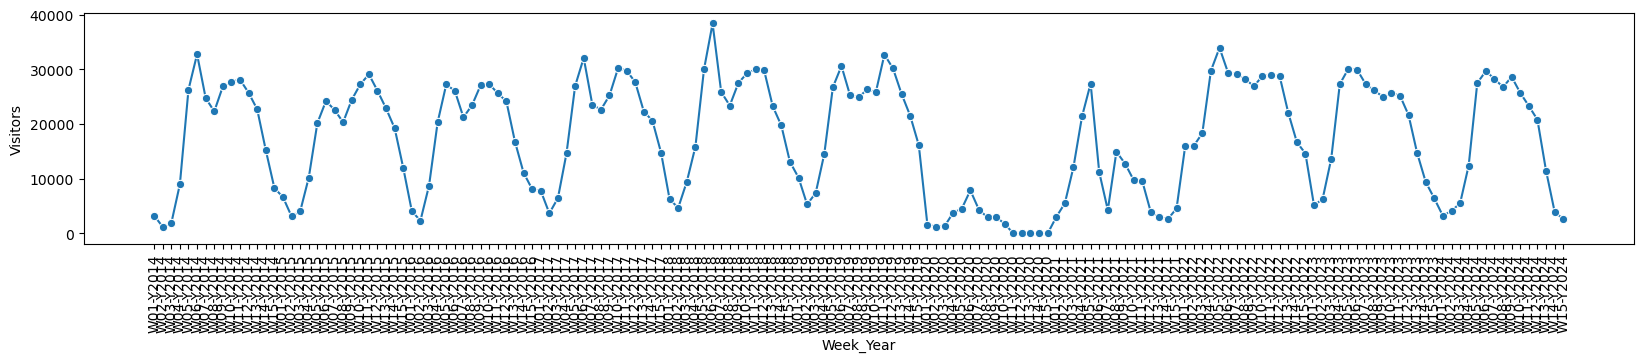

In [63]:
# Create a seaborn line plot
plt.figure(figsize=(20, 3))
sns.lineplot(data=df, x='Week_Year', y='Visitors' ,marker='o', errorbar= None)
plt.xticks(rotation = 90)

# Display the plot
plt.show()


Let's look into the total visited per year instead

Text(0.5, 1.0, 'Total number of Visitor per Year')

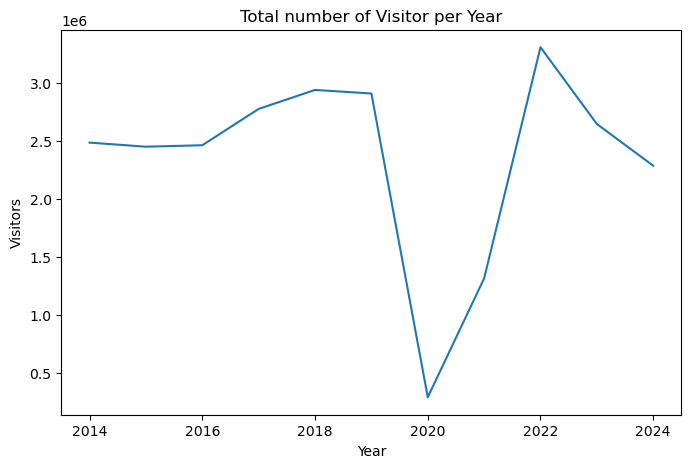

In [54]:
plt.figure(figsize=(8, 5))
visit_per_year = df.groupby(['Year'])['Visitors'].sum().reset_index()
sns.lineplot( visit_per_year, x= 'Year', y = 'Visitors')
plt.title('Total number of Visitor per Year')


obvious pattern, covid 2020 and 2021 have shown to dramatically reduced the number of visitors in total. Before Covids we can see that the number visitor was rising as well, there is a slight recovery after covid before dipping down.

Seasonal Pattern: 
- What is the overall pattern like throughout the years? What are the weeks to look out for that have the most people going around?

<Axes: xlabel='Week', ylabel='Visitors'>

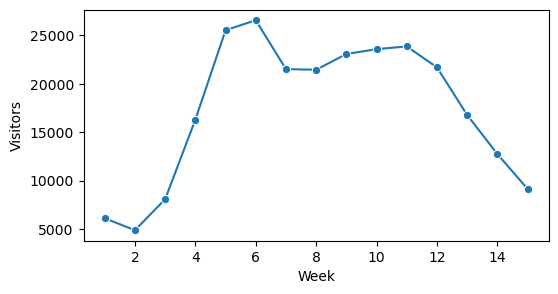

In [116]:
# temp = df[~df['Year'].isin([2020,2021])]
plt.figure(figsize=(6, 3))
sns.lineplot(data=df, x='Week', y='Visitors', marker='o',errorbar=None)

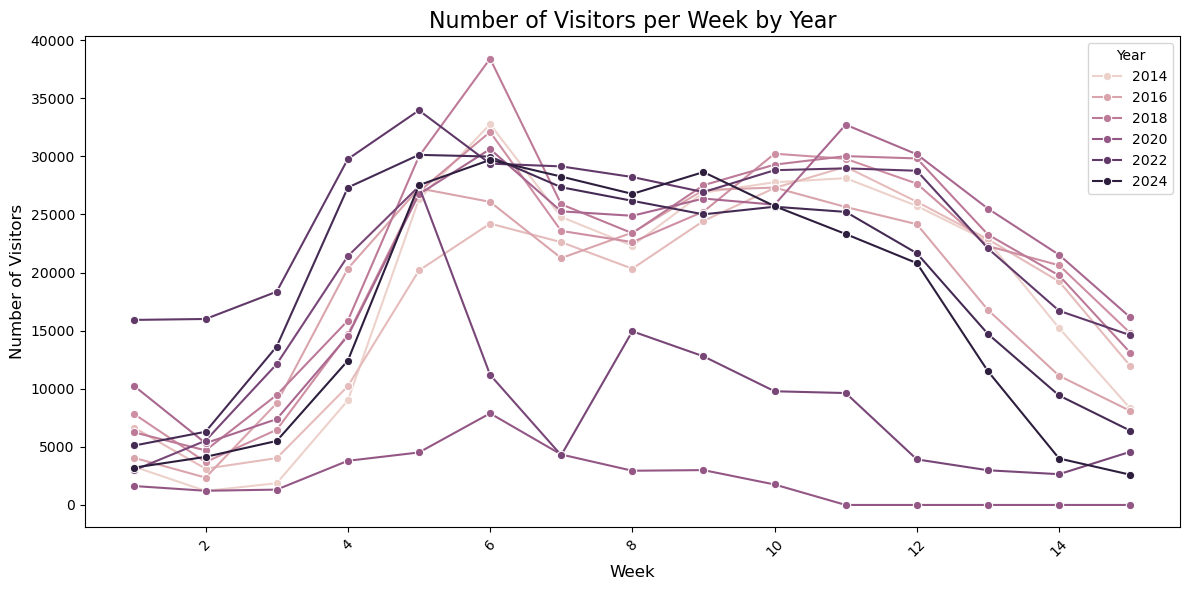

In [76]:
# Create a seaborn line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Week', y='Visitors', hue='Year', marker='o',errorbar=None)

# Add labels and title
plt.title('Number of Visitors per Week by Year', fontsize=16)
plt.xlabel('Week', fontsize=12)
plt.ylabel('Number of Visitors', fontsize=12)
plt.xticks(rotation=45)  # Rotate week labels for clarity

# Display the plot
plt.tight_layout()
plt.show()


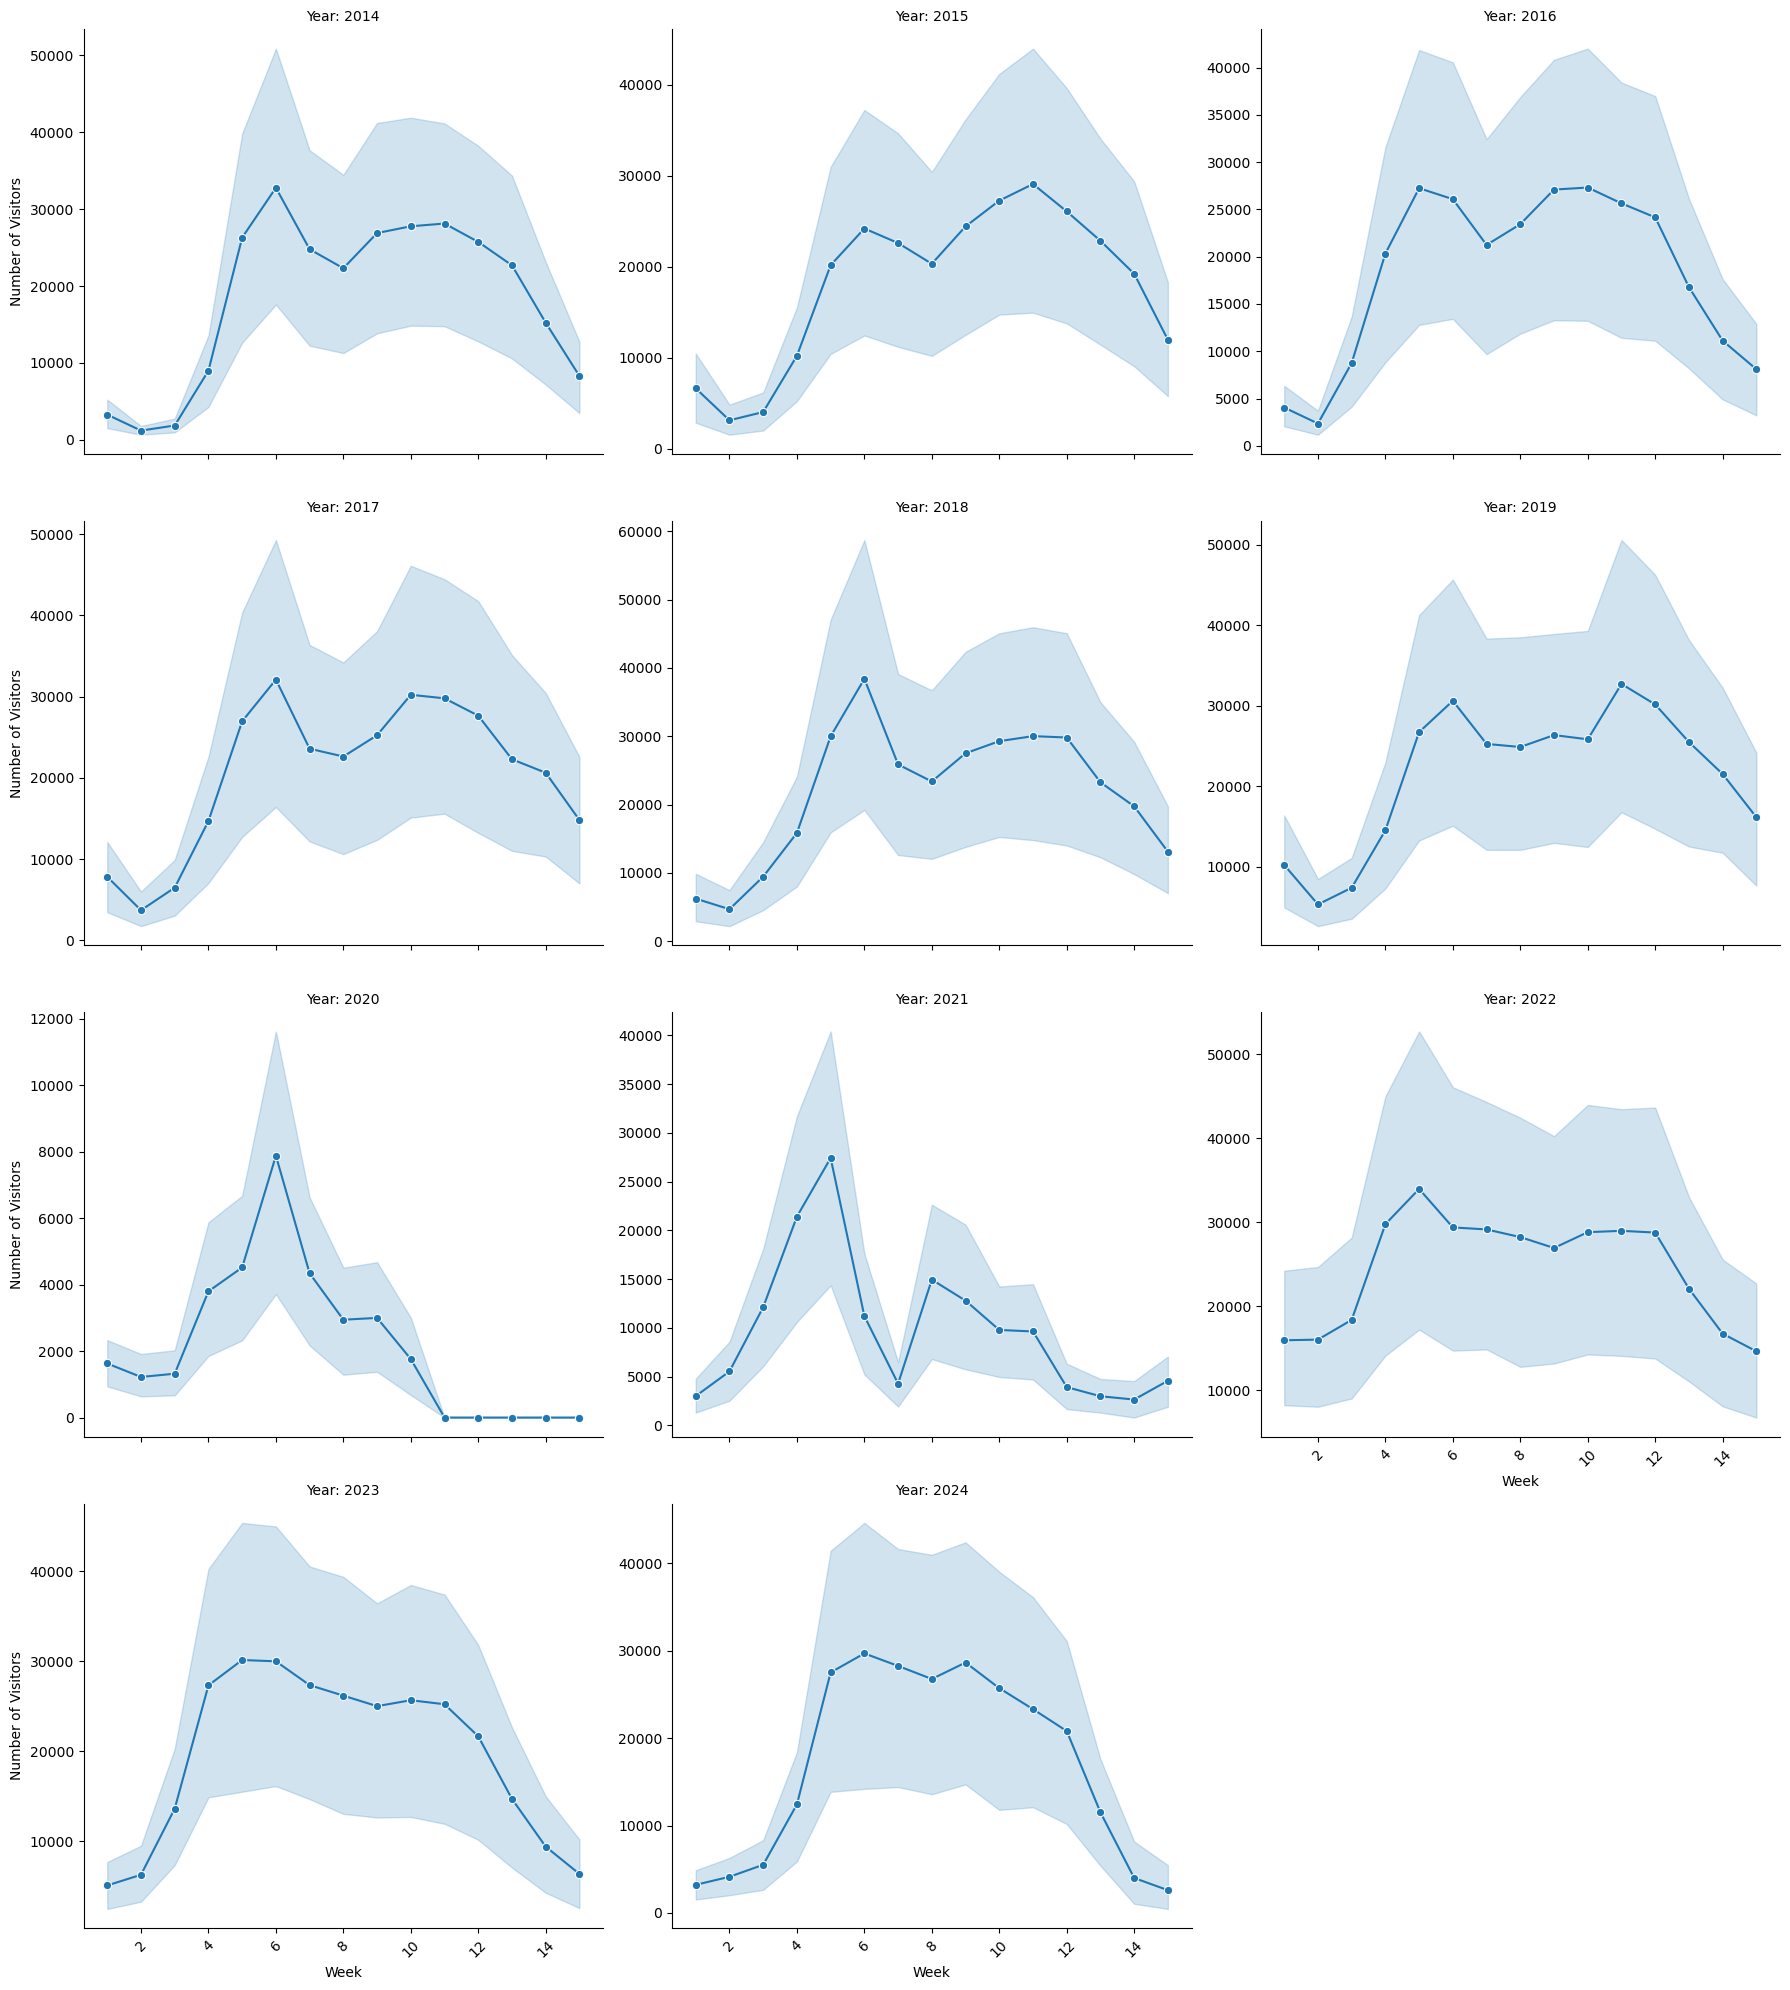

In [85]:
# Create faceted line plots (one column per year)
g = sns.relplot(
    data=df,
    x='Week',
    y='Visitors',
    kind='line',
    col='Year',
    marker='o',
    facet_kws={'sharey': False},  # Set to True if you want shared y-axis
    height=5,
    aspect=1.2,
    col_wrap= 3
)

# Adjust plot titles and layout
g.set_titles("Year: {col_name}")
g.set_axis_labels("Week", "Number of Visitors")
for ax in g.axes.flat:
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels

plt.tight_layout()
plt.show()


Look at the overall seasonality of the skking pattern, initial july is when the peak season started to hit, ramping everything up, especially early july around 14 july or so. The pattenr started falling off at around week 11 and 12 , 18-Aug
25-Aug. So around late august the amount of people start to decrease.

we should try and find out WHY there is a peak around starting around July falling off afteward. Factors to included are: 
- temp 
- snow conditions
- holiday calendars

## Why is there a Peak Around Early July?
Key Question: "Is the mid-season peak driven by better weather or by external factors like holidays?"

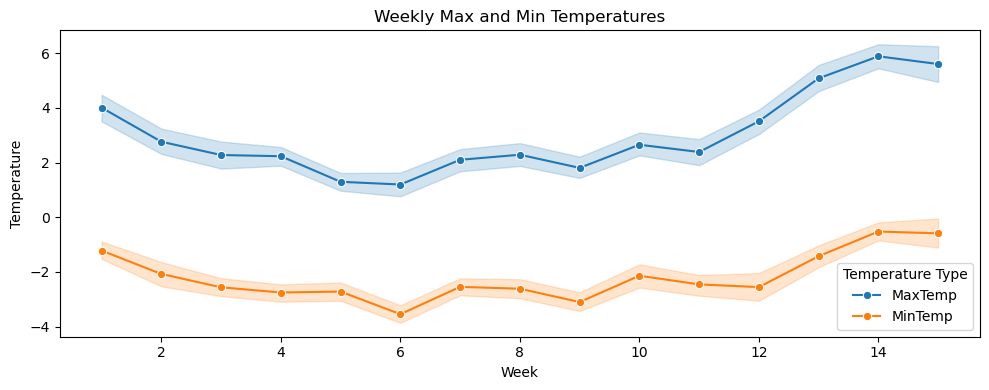

In [99]:
# Reshape the data to long format
temp_melt = pd.melt(df, id_vars='Week', value_vars=['MaxTemp', 'MinTemp'],
                    var_name='TemperatureType', value_name='Temperature')

# Plot both temperatures on the same axis
plt.figure(figsize=(10, 4))
sns.lineplot(data=temp_melt, x='Week', y='Temperature', hue='TemperatureType', marker='o')
plt.title('Weekly Max and Min Temperatures')
plt.xlabel('Week')
plt.ylabel('Temperature')
plt.legend(title='Temperature Type')
plt.tight_layout()
plt.show()


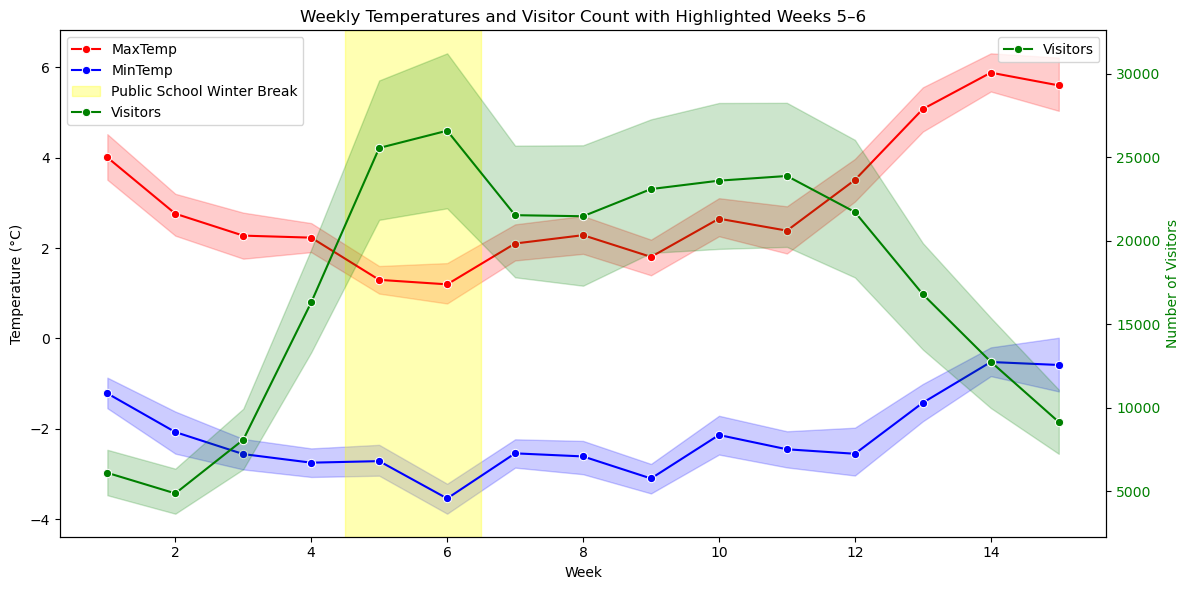

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot MaxTemp and MinTemp on the primary y-axis (left)
sns.lineplot(data=df, x='Week', y='MaxTemp', ax=ax1, label='MaxTemp', marker='o', color='red')
sns.lineplot(data=df, x='Week', y='MinTemp', ax=ax1, label='MinTemp', marker='o', color='blue')

# Set labels for primary axis
ax1.set_xlabel('Week')
ax1.set_ylabel('Temperature (°C)', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Highlight Weeks 5 and 6
ax1.axvspan(5 - 0.5, 6 + 0.5, color='yellow', alpha=0.3, label='Public School Winter Break')

# Create secondary axis for visitors (right y-axis)
ax2 = ax1.twinx()
sns.lineplot(data=df, x='Week', y='Visitors', ax=ax2, label='Visitors', marker='o', color='green')

# Set labels for secondary axis
ax2.set_ylabel('Number of Visitors', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.title('Weekly Temperatures and Visitor Count with Highlighted Weeks 5–6')
plt.tight_layout()
plt.show()


When the temp sit at it's lowest around the july there are more people going there as well since it's also the public winter holiday break it's hard to tell if there is anything to focus on. So let's look into more of the snow conditions factors instead.
we can try to use the average snow depth as a good appromixator of snow condition.